###
### ABC-news-data-text 前期的数据分析

In [2]:
import pandas as pd

# 读取文本文件
df = pd.read_csv('data/abcnews-date-text.txt', sep=',', header=None)

# 分割日期和文本
df[0] = df[0].astype(str)  # 将第一列转换为字符串类型
df['year'] = df[0].str[:4]  # 提取四位数字作为年份
df['text'] = df[1]  # 第二列为文本

# 删除原始列
df = df.drop(columns=[0, 1])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   year    1244184 non-null  object
 1   text    1244013 non-null  object
dtypes: object(2)
memory usage: 19.0+ MB


In [4]:
df.head()

,year,text
0,2003,aba decides community broadcasting licence
1,2003,act fire witnesses aware defamation
2,2003,calls infrastructure protection summit
3,2003,air nz staff aust strike pay rise
4,2003,air nz strike affect australian travellers


In [5]:
df['year'] = df['year'].astype(int)

### 增加标题长度列

In [6]:
# 定义函数，用于计算单词长度
def get_word_length(text):
    if isinstance(text, str):  # 检查是否为字符串类型
        words = text.split()
        return len(words)
    else:
        return 0  # 非字符串类型返回0

In [7]:
# 应用函数到每行的'text'列，并将结果赋值给'length'列
df['length'] = df['text'].apply(get_word_length)
df.head()

,year,text,length
0,2003,aba decides community broadcasting licence,5
1,2003,act fire witnesses aware defamation,5
2,2003,calls infrastructure protection summit,4
3,2003,air nz staff aust strike pay rise,7
4,2003,air nz strike affect australian travellers,6


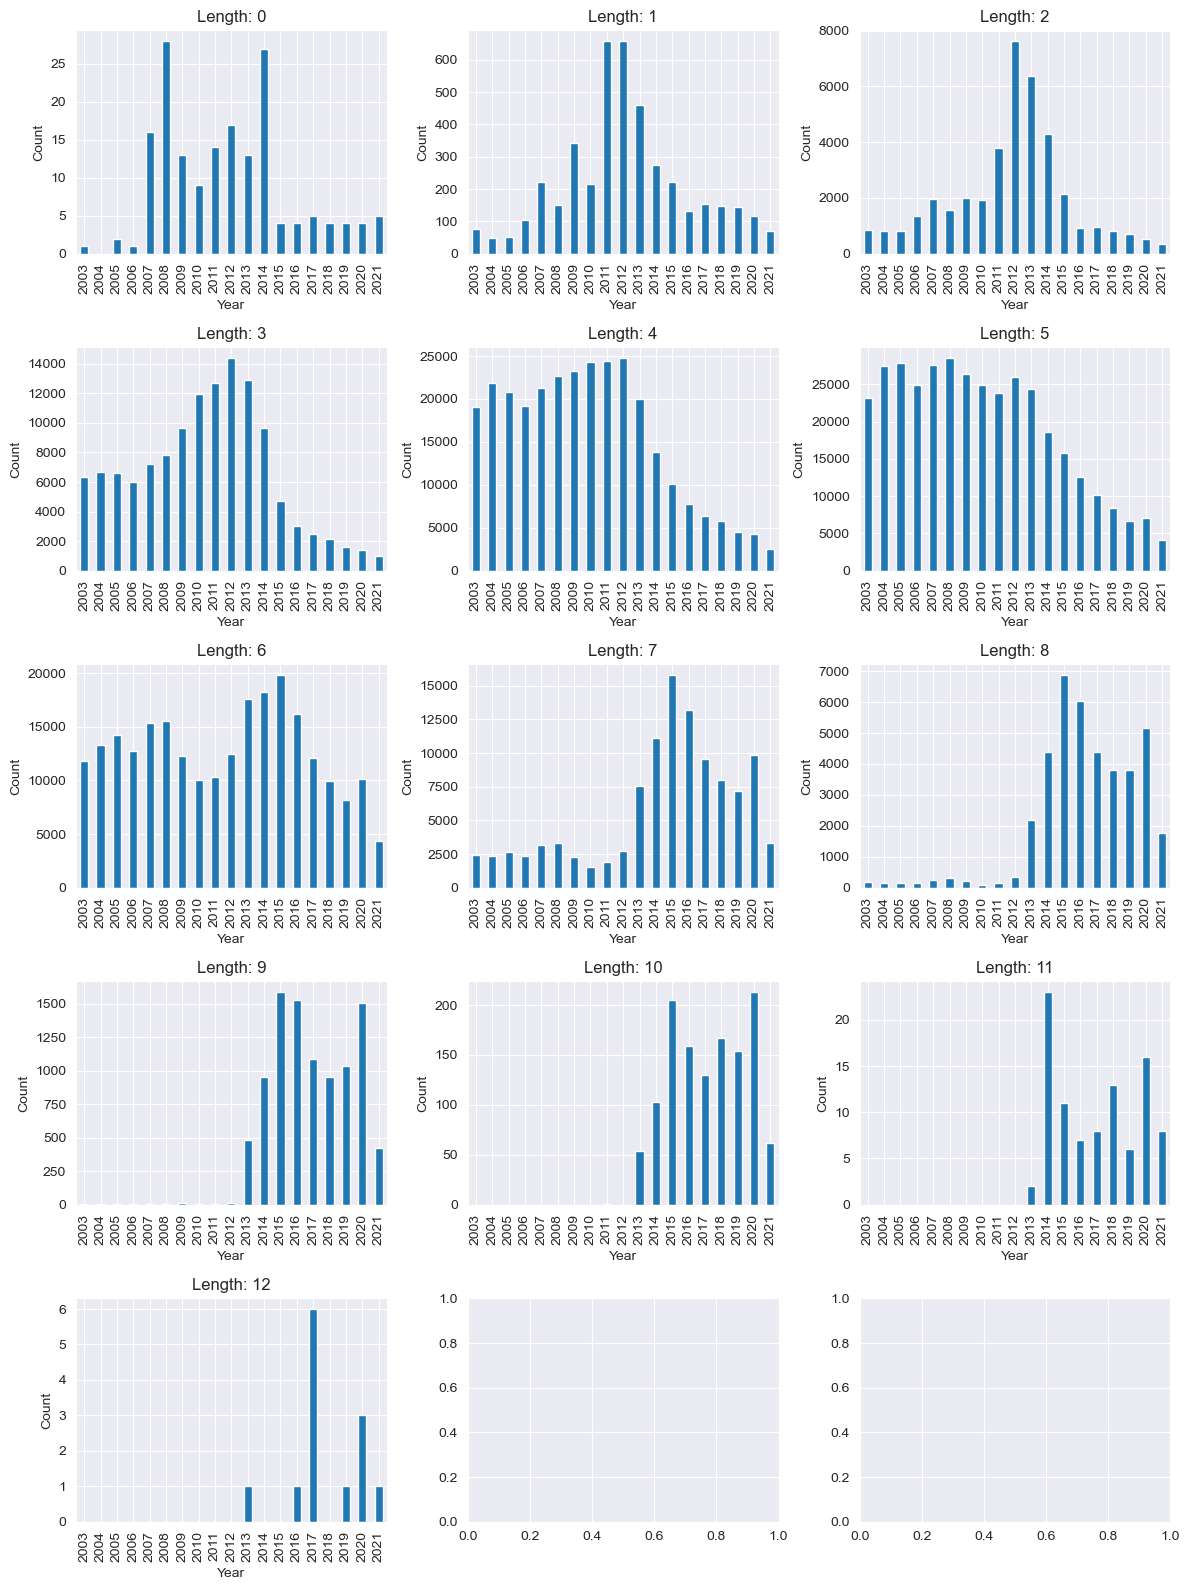

In [8]:
import matplotlib.pyplot as plt

# 假设您的DataFrame变量名为df

# 按长度分组并计算每个长度在每一年的数量
grouped = df.groupby(['length', 'year']).size().unstack()

# 创建15个子图（3列，5行）
fig, axes = plt.subplots(5, 3, figsize=(12, 16))

# 遍历每个长度
for i, length in enumerate(range(13)):
    # 计算子图的行和列索引
    row = i // 3
    col = i % 3

    # 获取当前长度在每年的数量数据
    data = grouped.loc[length]

    # 绘制柱状图
    data.plot(kind='bar', ax=axes[row, col], legend=False)
    axes[row, col].set_title('Length: {}'.format(length))
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Count')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()


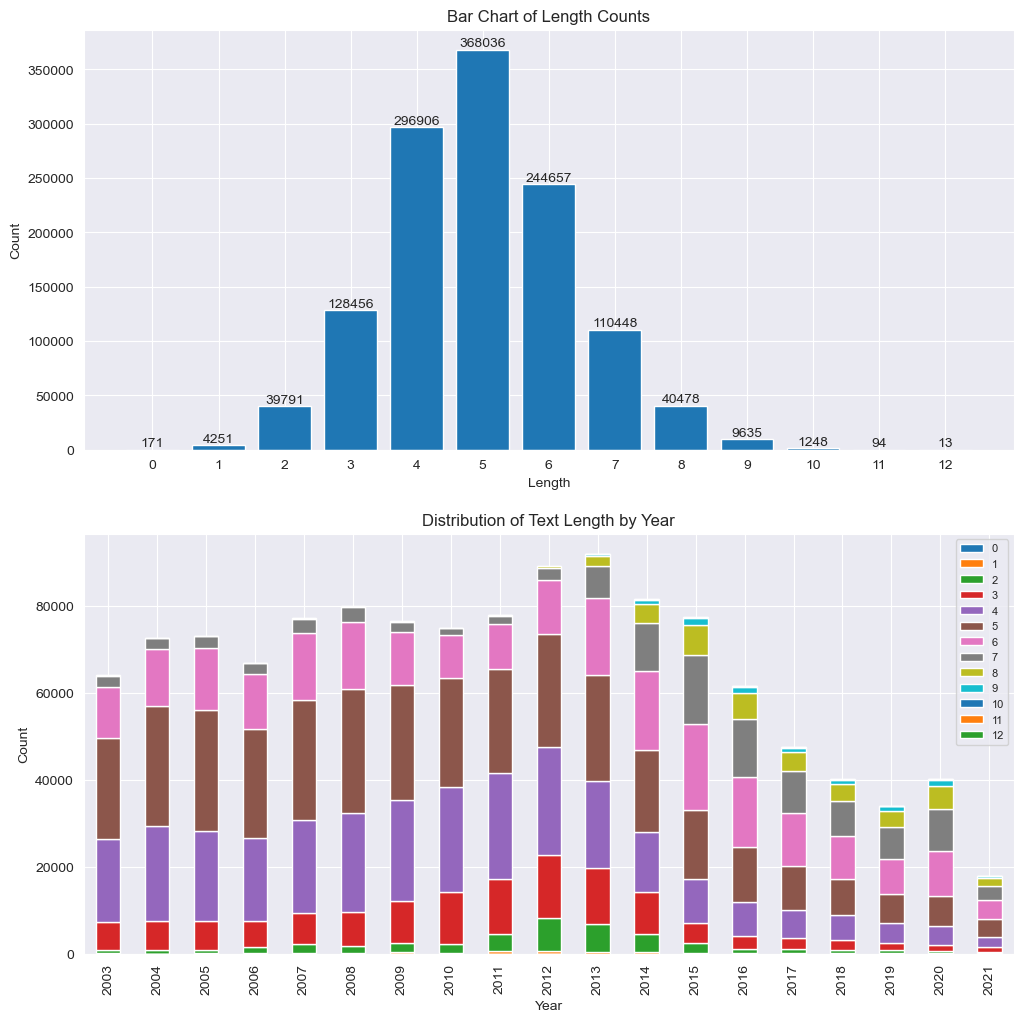

In [9]:
# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 第一个子图 - 柱状图
length_counts = df['length'].value_counts().sort_index()
ax1.bar(length_counts.index, length_counts.values)
ax1.set_xlabel('Length')
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart of Length Counts')

for i, count in enumerate(length_counts.values):
    ax1.text(length_counts.index[i], count, str(count), ha='center', va='bottom')

ax1.set_xticks(range(len(length_counts)))
ax1.set_xticklabels(length_counts.index)

# 第二个子图 - 堆叠柱状图
counts = df.groupby(['year', 'length']).size().unstack()
counts.plot(kind='bar', stacked=True, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Text Length by Year')

ax2.legend(fontsize=8)

plt.subplots_adjust(hspace=0.2)

# 显示图形
plt.show()

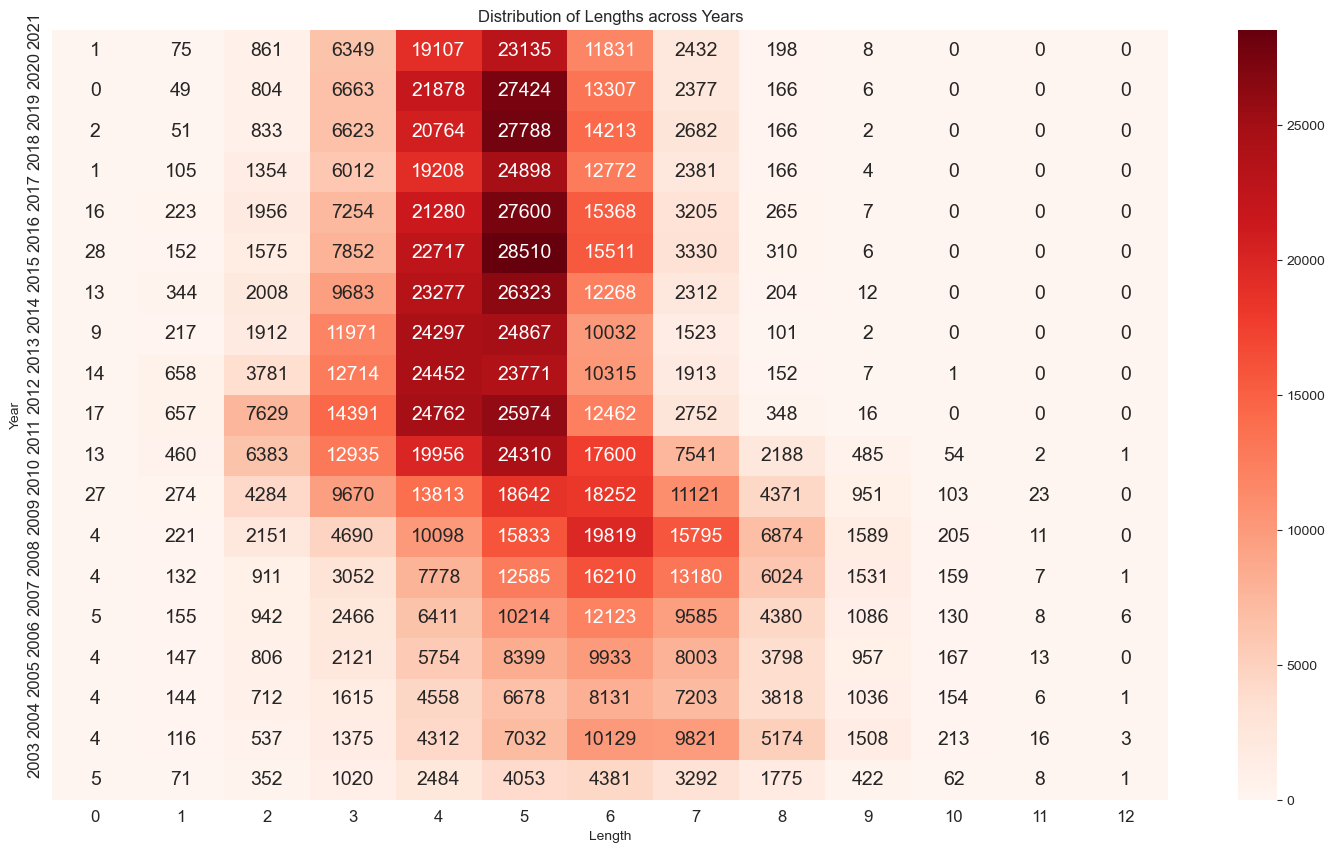

In [10]:
import seaborn as sns

# 创建一个透视表，将年份作为行索引，长度作为列索引，统计每个组合的数量
pivot_df = df.pivot_table(index='year', columns='length', aggfunc='size', fill_value=0)

# 对透视表的行索引和列索引进行排序
pivot_df = pivot_df.sort_index(axis=0)
pivot_df = pivot_df.sort_index(axis=1)

# 按年份的低到高顺序获取排序后的年份列表并逆序
years = sorted(pivot_df.index, reverse=True)

# 绘制热力图，并设置颜色为暖色调，同时设置注释文本的字体大小
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_df, cmap='Reds', annot=True, fmt="d", cbar=True, annot_kws={"fontsize": 14})

# 设置标题的字体大小
plt.title('Distribution of Lengths across Years')

# 设置横坐标和纵坐标标签的字体大小
plt.xlabel('Length')
plt.ylabel('Year')

# 修改y轴标签的显示顺序为按年份的低到高顺序
plt.yticks(ticks=range(len(years)), labels=years)
# 设置刻度值字体大小
plt.tick_params(axis='both', labelsize=12)
# 显示图表
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   year    1244184 non-null  int32 
 1   text    1244013 non-null  object
 2   length  1244184 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 23.7+ MB


In [14]:
df.reset_index(inplace=True)
df.head()

,index,year,text,length
0,0,2003,aba decides community broadcasting licence,5
1,1,2003,act fire witnesses aware defamation,5
2,2,2003,calls infrastructure protection summit,4
3,3,2003,air nz staff aust strike pay rise,7
4,4,2003,air nz strike affect australian travellers,6


In [ ]:
import hashlib

# 假设您的DataFrame对象名为df，示例数据存储在名为"text"的列中

# 创建一个新的列，用于存储文本数据的哈希值
df['hash'] = df['text'].apply(lambda x: hashlib.md5(str(x).encode()).hexdigest())

# 去除基于哈希值的重复项
df.drop_duplicates(subset='hash', keep='first', inplace=True)

# 删除哈希值列
df.drop('hash', axis=1, inplace=True)

In [ ]:
df